In [1]:
import numpy as np
import scipy.optimize as SciOpt
import scipy.stats as SciStat
import scipy.special as SciSpec
from numpy import random as rnd
from numpy import linalg as LA
import matplotlib.pyplot as plt
import statsmodels.api as sm

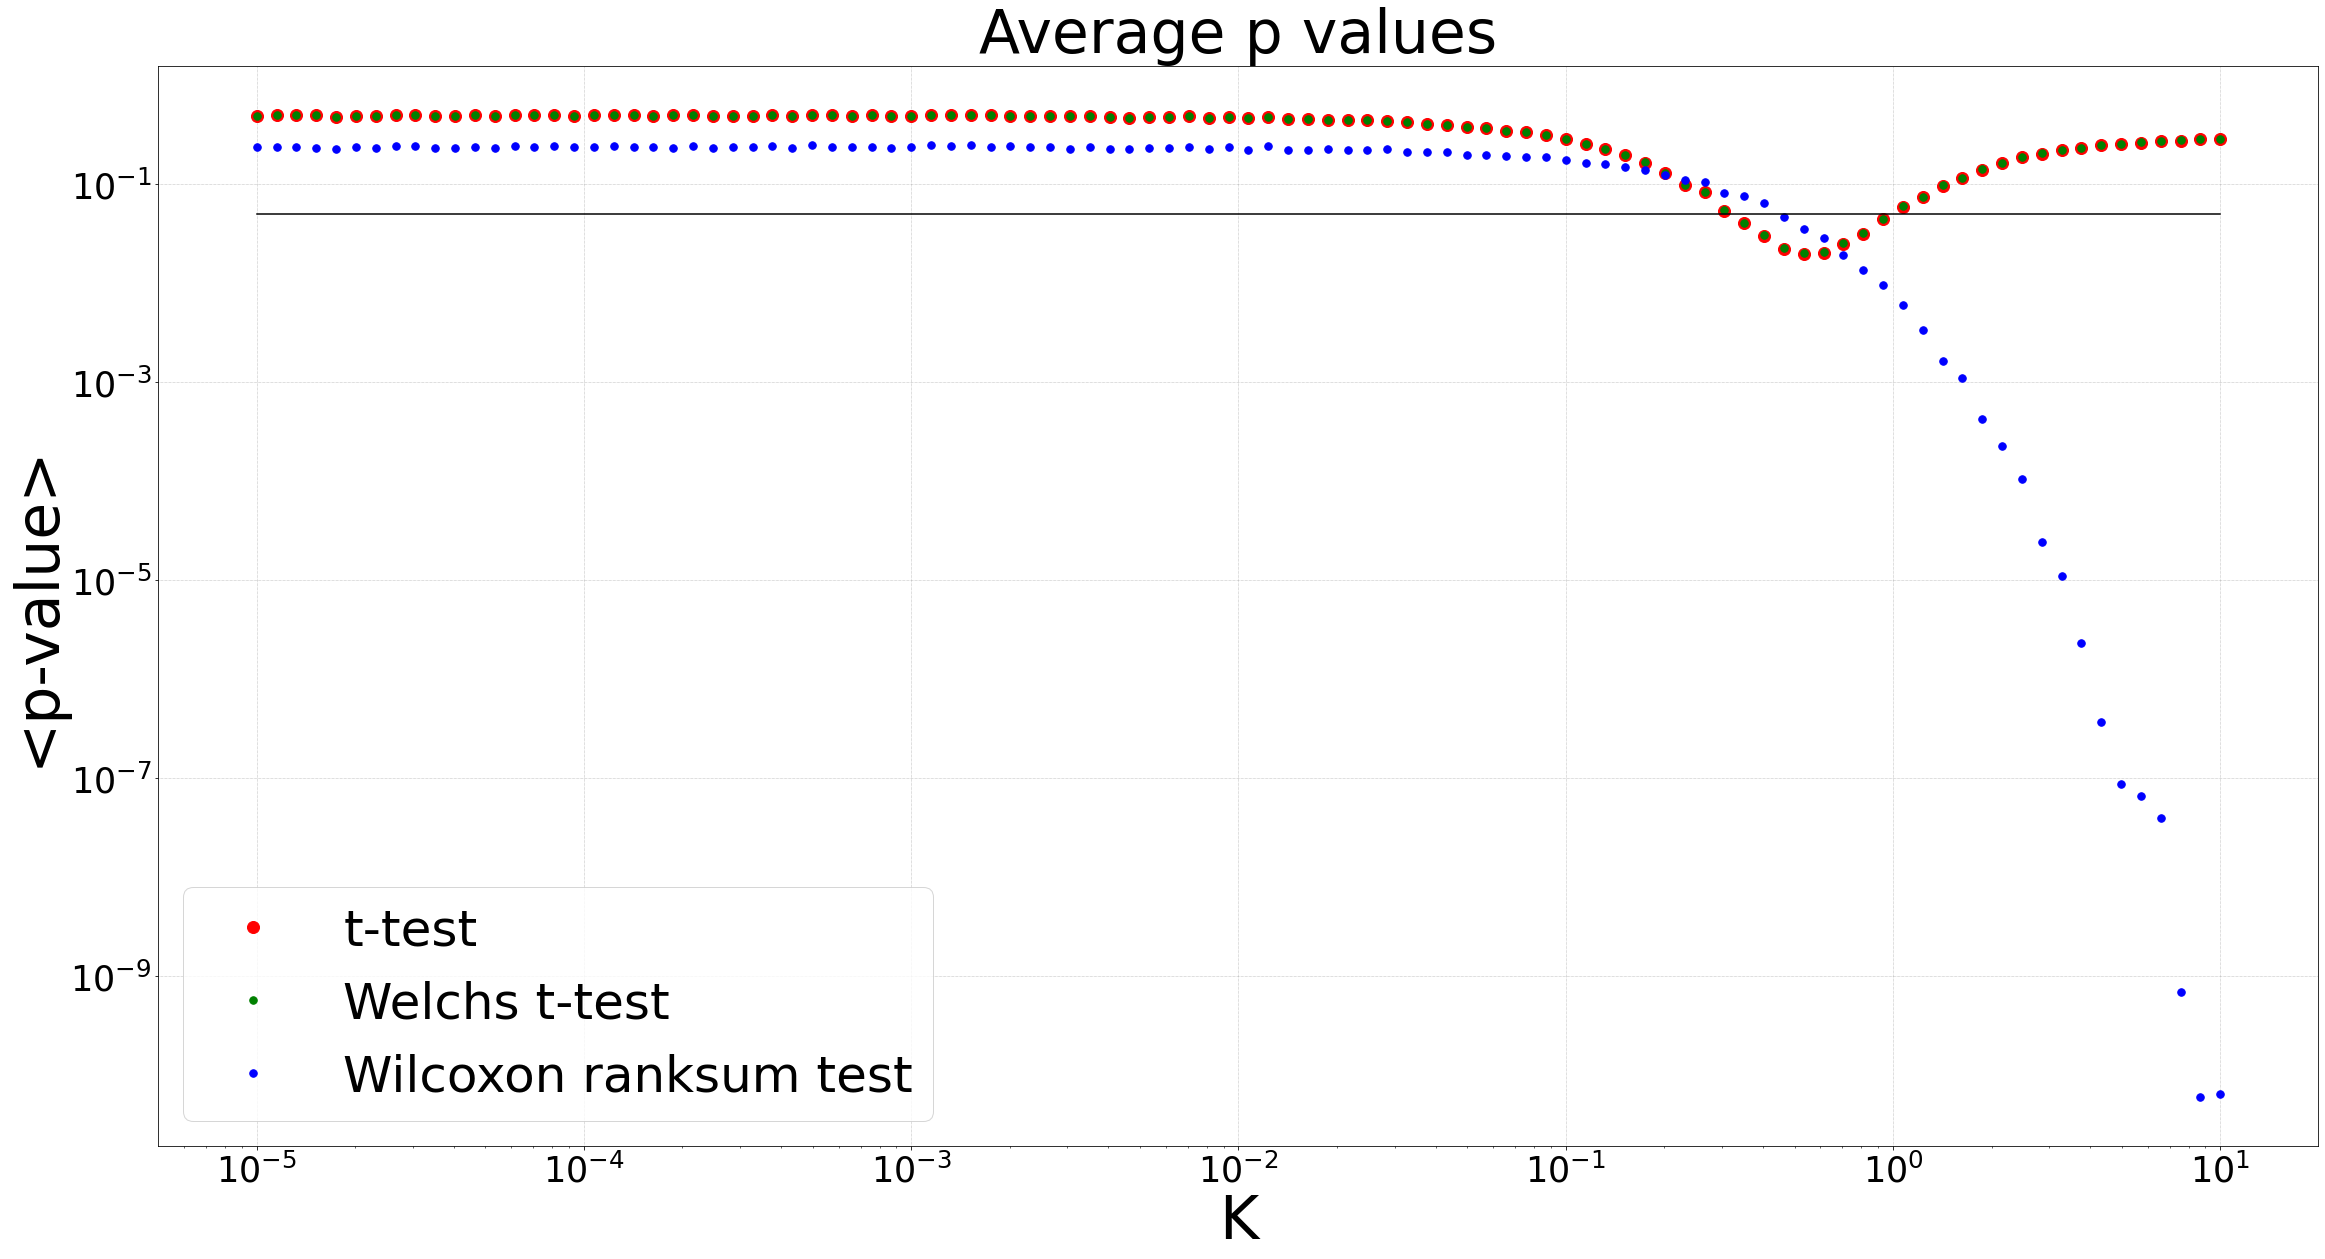

In [4]:
#This is how many K parameter values we will use
N=int(1e2)
#Generate reference data set
data_ref=SciStat.genpareto.rvs(0,size=N)
#We will record averages of p values for three tests
P1=np.zeros((N,1))
P2=np.zeros((N,1))
P3=np.zeros((N,1))
#Iterate over K values
K=np.logspace(-5,1,N)
for ii in np.linspace(1,len(K),len(K)).astype(int):
    #This is how data points per data set we will use
    Np=int(2e3)
    #We will record p values for three tests
    p1=np.zeros(Np)
    p2=np.zeros(Np)
    p3=np.zeros(Np)
    #Run a bunch of tests for each K
    for jj in np.linspace(1,Np,Np).astype(int):
        #Generate test data, minding that long tails
        #can produce infinite values
        data=np.zeros(N); kk=0;
        while kk<N: 
            tmp=SciStat.genpareto.rvs(K[ii-1],size=1)
            if not(np.isinf(tmp)):
                data[kk]=tmp; kk+=1
        #Do t-test 
        stat,pvalue=SciStat.ttest_ind(data_ref,data,equal_var=True)   
        p1[jj-1]=pvalue
        #Do Welch's t-test 
        stat,pvalue=SciStat.ttest_ind(data_ref,data,equal_var=False)   
        p2[jj-1]=pvalue
        #Do Wilcoxon test
        stat,pvalue=SciStat.ranksums(data_ref,data)  
        p3[jj-1]=pvalue
    #Average out the p values
    P1[ii-1]=np.mean(p1);   
    P2[ii-1]=np.mean(p2);   
    P3[ii-1]=np.mean(p3);  
#Create the plot 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#
plt.loglog(K,P1,'r.',label='t-test',markersize=24)
plt.loglog(K,P2,'g.',label='Welchs t-test',markersize=15)
plt.loglog(K,P3,'b.',label='Wilcoxon ranksum test',markersize=15)
plt.loglog(K,0.05*np.full_like(K,1),'k')
plt.title('Average p values',fontsize=60)
plt.xlabel('K',fontsize=60); 
plt.ylabel('<p-value>',fontsize=60)
#Add some grid lines and dump to screen
plt.grid(color='gray', linestyle='dotted', linewidth=.5)
plt.grid(visible=True)
#Make the plot presentable
plt.xticks(size = 35)
plt.yticks(size = 35)
plt.legend(fontsize=50)
plt.rcParams['figure.figsize'] = [30, 15]

/usr/local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5756: RuntimeWarning: overflow encountered in double_scalars
  df = (vn1 + vn2)**2 / (vn1**2 / (n1 - 1) + vn2**2 / (n2 - 1))
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


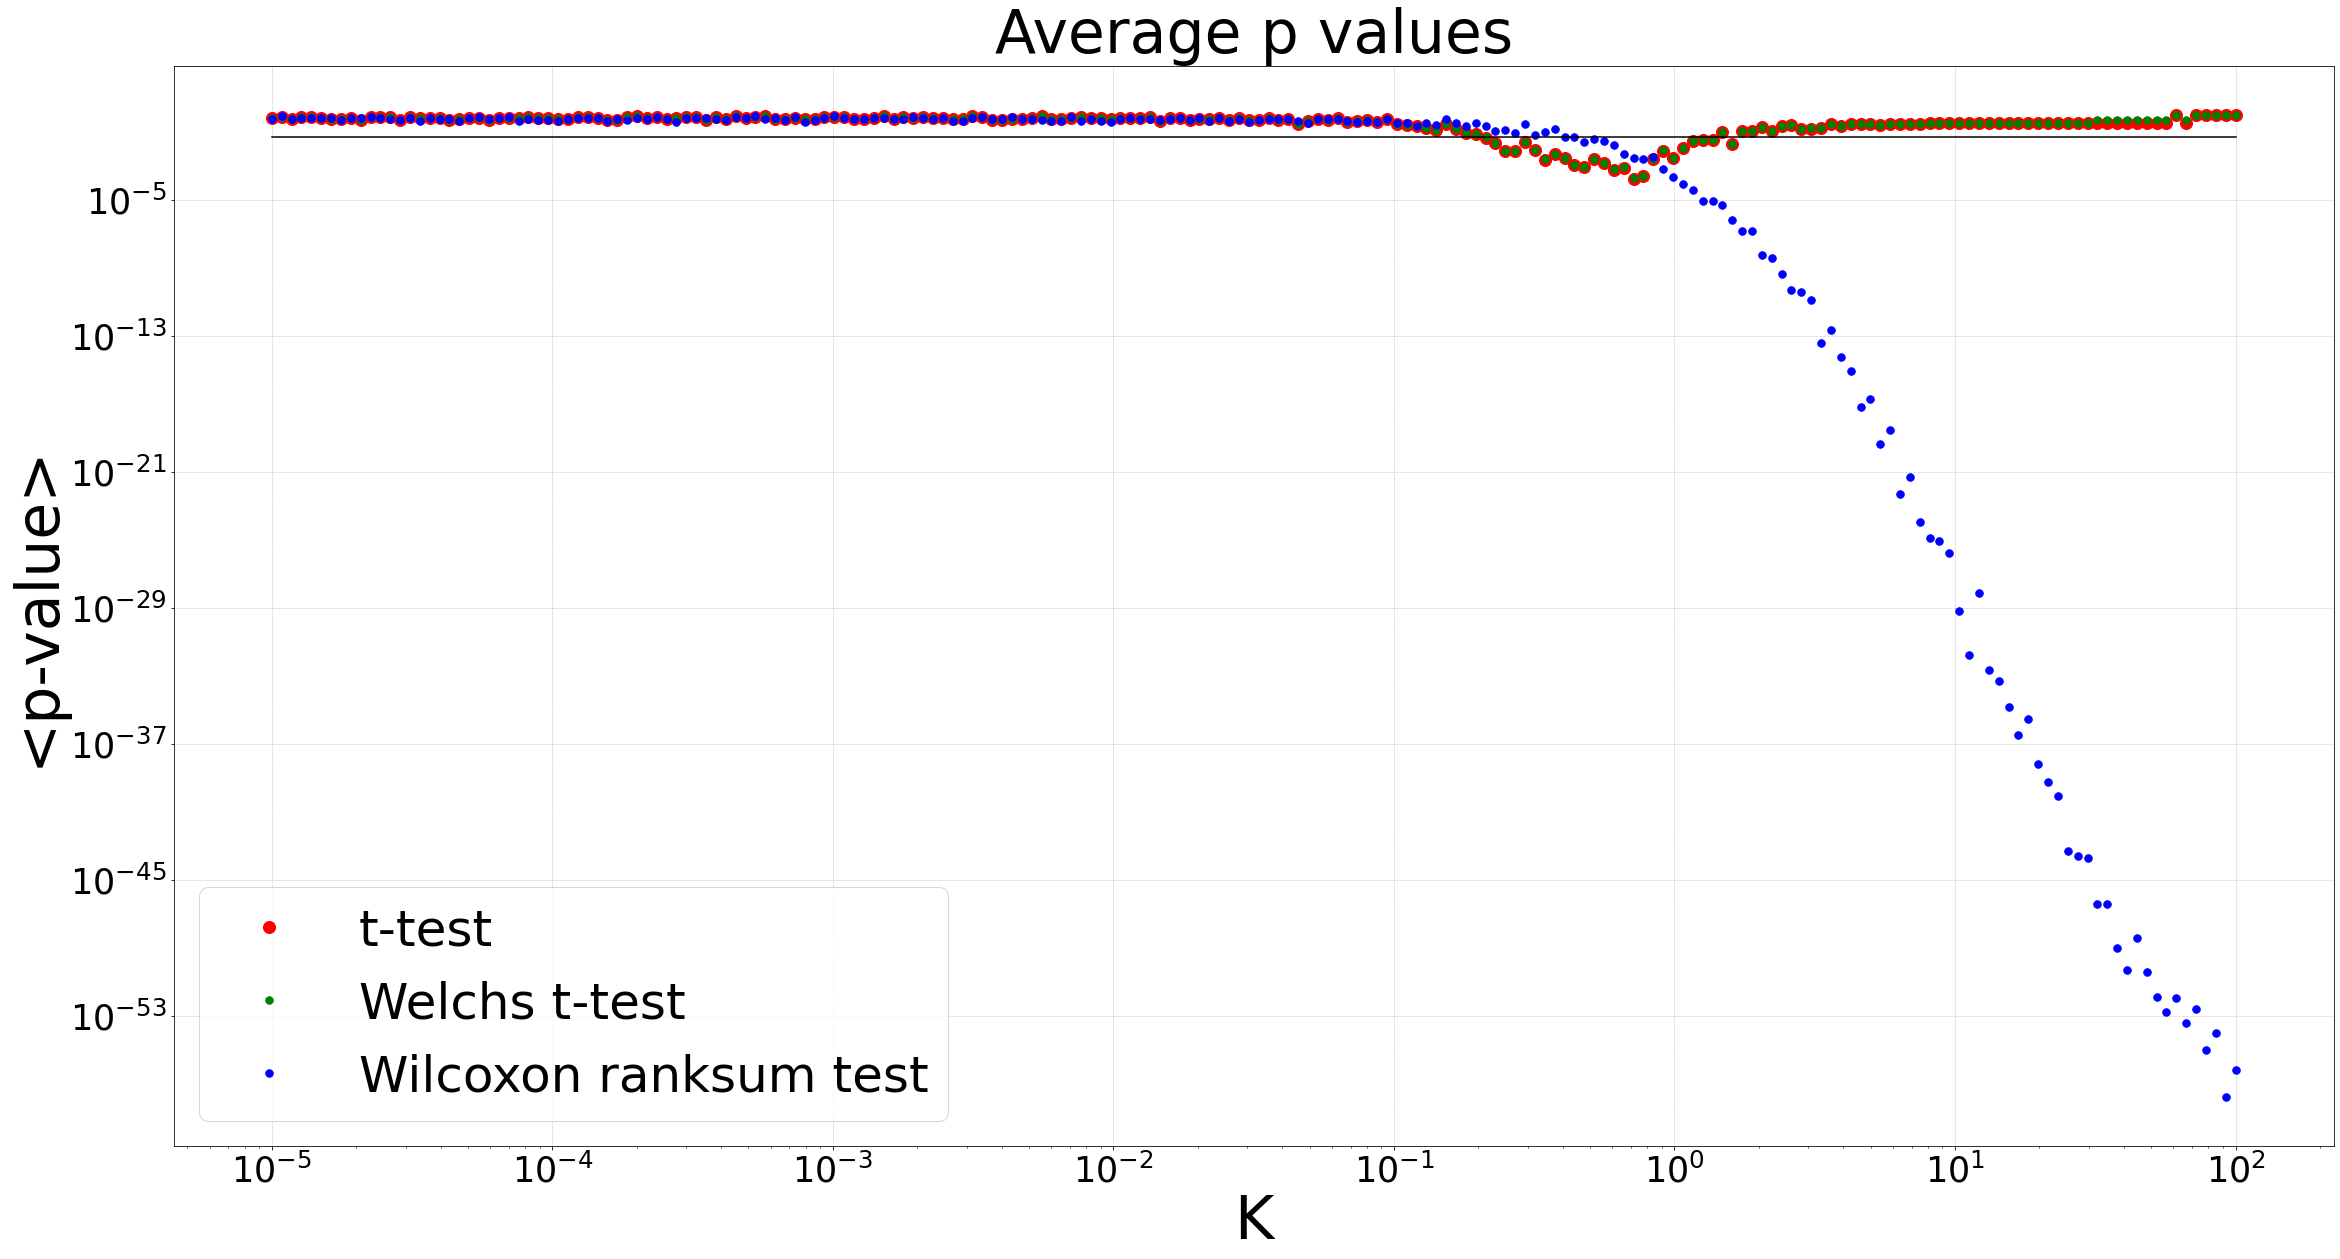

In [6]:
#This is how many K parameter values we will use
N=int(2e2)
#Generate reference data set
data_ref=SciStat.genpareto.rvs(0,size=N)
#We will record medians of p values for three tests
P1=np.zeros((N,1))
P2=np.zeros((N,1))
P3=np.zeros((N,1))
#Iterate over K values
K=np.logspace(-5,2,N)
for ii in np.linspace(1,len(K),len(K)).astype(int):
    #This is how data points per data set we will use
    Np=int(20)
    #We will record p values for three tests
    p1=np.zeros(Np)
    p2=np.zeros(Np)
    p3=np.zeros(Np)
    #Run a bunch of tests for each K
    for jj in np.linspace(1,Np,Np).astype(int):
        #Generate test data, minding that long tails
        #can produce infinite values
        data=np.zeros(N); kk=0
        while kk<N: 
            tmp=SciStat.genpareto.rvs(K[ii-1],size=1)
            if not(np.isinf(tmp)):
                data[kk]=tmp; kk+=1
        #Do t-test 
        stat,pvalue=SciStat.ttest_ind(data_ref,data,equal_var=True)   
        p1[jj-1]=pvalue
        #Do Welch's t-test 
        stat,pvalue=SciStat.ttest_ind(data_ref,data,equal_var=False)   
        p2[jj-1]=pvalue
        #Do Wilcoxon test
        stat,pvalue=SciStat.ranksums(data_ref,data)  
        p3[jj-1]=pvalue
    #Get the location of p values via median this time
    P1[ii-1]=np.median(p1);   
    P2[ii-1]=np.median(p2);   
    P3[ii-1]=np.median(p3);  
#Create the plot 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#
plt.loglog(K,P1,'r.',label='t-test', markersize=24)
plt.loglog(K,P2,'g.',label='Welchs t-test', markersize=15)
plt.loglog(K,P3,'b.',label='Wilcoxon ranksum test', markersize=15)
plt.loglog(K,0.05*np.full_like(K,1),'k')
plt.title('Average p values', fontsize=60)
plt.xlabel('K', fontsize=60)
plt.ylabel('<p-value>', fontsize=60)
#Add some grid lines and dump to screen
plt.grid(color='gray', linestyle='dotted', linewidth=.5)
plt.grid(visible=True)
#Make the plot presentable
plt.xticks(size = 35)
plt.yticks(size = 35)
plt.legend(fontsize=50)
plt.rcParams['figure.figsize'] = [30, 15]